<div style="font-size:16px; color:darkblue;">
    https://www.kaggle.com/jtrofe/beer-recipes
</div>

<div style="font-size:16px; color:darkblue;">
    BeerID - Record ID<br/>
    Name - Name<br/>
    URL - Location of recipe webpage at https://www.brewersfriend.com<br/>
    Style - Type of brew<br/>
    StyleID - Numeric ID for type of brew<br/>
    Size(L) - Amount brewed for recipe listed<br/>
    OG - Specific gravity of wort before fermentation<br/>
    FG - Specific gravity of wort after fermentation<br/>
    ABV - Alcohol By Volume<br/>
    IBU - International Bittering Units<br/>
    Color - Standard Reference Method - light to dark ex. 40 = black<br/>
    BoilSize - Fluid at beginning of boil<br/>
    BoilTime - Time wort is boiled<br/>
    BoilGravity - Specific gravity of wort before the boil<br/>
    Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash<br/>
    MashThickness - Amount of water per pound of grain<br/>
    SugarScale - Scale to determine the concentration of dissolved solids in wort<br/>
    BrewMethod - Various techniques for brewing<br/>
    PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P<br/>
    PrimaryTemp - Temperature at the fermenting stage<br/>
    PrimingMethod - Priming method used, e.g., corn sugar<br/>
    PrimingAmount - Amount of priming sugar used<br/>
    UserId
</div>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

pd.options.display.max_rows = 20
%matplotlib inline

In [ ]:
#!type recipeData.csv

In [ ]:
df = pd.read_csv ('recipeData.csv')
df

In [ ]:
df.columns

In [ ]:
df.shape

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [10]:
df.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


<div style="font-size:16px; color:darkblue;">
    This is a dataset of 75,000 homebrewed beers with over 176 different styles.<br/>
    Beer records are user-reported and are classified according to one of the 176 different styles.<br/>
    These recipes go into as much or as little detail as the user provided, but there's are least 
    5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, 
    and Color
</div>

<div style="font-size:16px; color:darkblue;">
    What goes into homemade beer?<br/>
    It would be interesting to see if the data provided is enough to define each class or if there 
    are undiscovered patterns. In the future it might be possible to go through and scrape more 
    detailed information for each recipe, such as the yeast and specific hops used.
</div>

In [11]:
df = df.drop('URL', axis=1)

In [12]:
df = df.drop('BeerID', axis=1)

In [13]:
df = df.drop('UserId', axis=1)

In [14]:
df

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
0,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN
6,Russian River Pliny the Elder (original),Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
7,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz
8,Chocolate Vanilla Porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz
9,Mango Habanero IPA,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C


In [15]:
df.isnull().sum()

Name                 1
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

In [16]:
# StyleId and Style are redundant, since there are 596 missing values in Style, they can be recovered by the StyleID
# in case the Style can not be recovered (there is only one instance of the StyleID, then we should eliminate that row)
dfStyle = pd.read_csv('styleData.csv', encoding='latin1', index_col='StyleID')
dfStyle.head()

,Style
StyleID,
1,Altbier
2,Alternative Grain Beer
3,Alternative Sugar Beer
4,American Amber Ale
5,American Barleywine


In [17]:
df['StyleID'].iloc[np.where(df['Style'].isnull())]

38       111
87       111
192      111
347      111
577      111
816      111
944      111
1002     111
1107     111
1178     111
        ... 
72863    111
72887    111
72938    111
72954    111
73354    111
73413    111
73600    111
73634    111
73700    111
73858    111
Name: StyleID, Length: 596, dtype: int64

In [18]:
df['StyleID'].iloc[np.where(df['Style'].isnull())].nunique()

1

In [19]:
# So based on this analysis we should drop all the missing style rows since the type and ID are both unknown
dfStyle.loc[111]

Style    NaN
Name: 111, dtype: object

In [20]:
df = df[df['Style'].notnull()]

In [21]:
df.isnull().sum()

Name                 1
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66521
PrimingAmount    68511
dtype: int64

In [22]:
100*df['PrimingAmount'].isnull().sum()/len(df)

93.51122637002662

In [23]:
100*df['PrimingMethod'].isnull().sum()/len(df)

90.79505903228008

In [24]:
# PrimingMethod and PrimingAmount have more than 90% missing data, so it is better to drop these features

In [25]:
dfClean = df.drop(['PrimingMethod','PrimingAmount'],axis=1)

In [26]:
dfClean.isnull().sum()

Name                 1
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
dtype: int64

In [27]:
#Ideas that Jyotika and I came up with that can be explored for the assignment.
#Data analysis model and Predictive model
#Predictive model based on linear model – rsqaured 
##1. Model that predicts the style based on colour and OG and FG – feed these values we find the style of the beer 
#2. Model that predicts the colours based Based on the ABV and OG 

#Data analysis model - 
#Correlating IBU to ABV or Color and predict which one has a high correlation value. 

In [28]:
#name analysis, based on style. What do names look like, do they 
#differ by style, what kind of creativity goes into choosing a name?

In [29]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import scipy.stats as stats
import pylab
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
% matplotlib inline

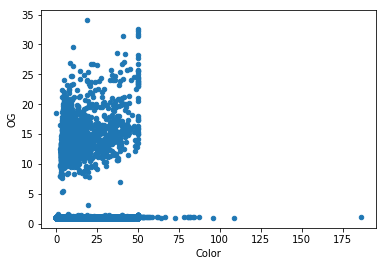

In [35]:
df.plot(kind='scatter',x='Color', y='OG')

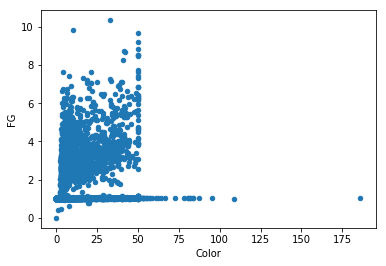

In [36]:
df.plot(kind='scatter',x='Color', y='FG')

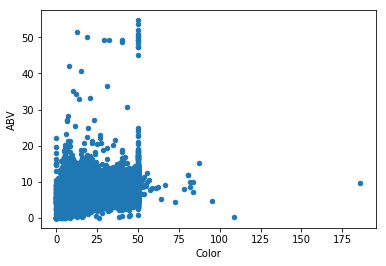

In [39]:
df.plot(kind='scatter',x='Color', y='ABV')

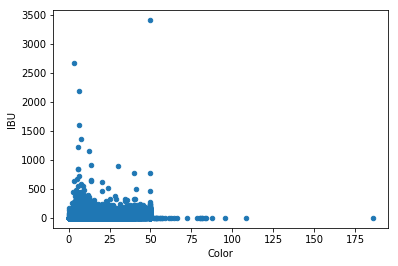

In [42]:
df.plot(kind='scatter',x='Color', y='IBU')

In [ ]:
#Should we remove the outliers...?

In [30]:
model = sm.ols("Color ~ OG + FG", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Color   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     123.8
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.12e-54
Time:                        18:01:53   Log-Likelihood:            -2.8550e+05
No. Observations:               73265   AIC:                         5.710e+05
Df Residuals:                   73262   BIC:                         5.710e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2683      0.269     34.473      0.000       8.741       9.795
OG            -0.8277      0.062    -13.264      0.000      -0.950      -0.705
FG             4.9268      0.322     15.279      0.000       4.295       5.559
==============================================================================
Omnibus:                    20205.792   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45789.884
Skew:                           1.591   Prob(JB):                         0.00
Kurtosis:                       5.208   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model = sm.ols("Color ~ ABV + OG", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Color   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2892.
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:06:55   Log-Likelihood:            -2.8284e+05
No. Observations:               73265   AIC:                         5.657e+05
Df Residuals:                   73262   BIC:                         5.657e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7951      0.147     18.991      0.000       2.507       3.084
ABV            1.7213      0.023     75.951      0.000       1.677       1.766
OG             0.0305      0.019      1.578      0.115      -0.007       0.068
==============================================================================
Omnibus:                    18068.145   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38974.105
Skew:                           1.440   Prob(JB):                         0.00
Kurtosis:                       5.114   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model = sm.ols("IBU ~ ABV + Color", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IBU   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3187.
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:07:27   Log-Likelihood:            -3.7405e+05
No. Observations:               73265   AIC:                         7.481e+05
Df Residuals:                   73262   BIC:                         7.481e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0292      0.506     11.910      0.000       5.037       7.021
ABV            6.3647      0.082     77.887      0.000       6.205       6.525
Color         -0.0536      0.013     -4.175      0.000      -0.079      -0.028
==============================================================================
Omnibus:                   151116.241   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2806442046.589
Skew:                          16.787   Prob(JB):                         0.00
Kurtosis:                     961.228   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 4)

In [ ]:
pd.scatter_matrix(df, diagonal='kde', figsize=(10, 10));

In [ ]:
plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
import collections
from wordcloud import WordCloud

In [ ]:
#df.describe('Name')
#can someone help with name analysis? I'm thinking word count to start with
#I'm attempting a word cloud

wordcloud = WordCloud(background_color='white',
                          width=1200,
                          height=1000
                         ).generate((d.most_common(10)))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()